# Time for some plots

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plotpath = '/home/mswiatlowski/start_tf/caloml-atlas/regression/Plots/'
modelpath_c = '/home/mswiatlowski/start_tf/caloml-atlas/classifier/Models/'
# %config InlineBackend.figure_format = 'svg'

# metadata
layers = ["EMB1", "EMB2", "EMB3", "TileBar0", "TileBar1", "TileBar2"]
cell_size_phi = [0.098, 0.0245, 0.0245, 0.1, 0.1, 0.1]
cell_size_eta = [0.0031, 0.025, 0.05, 0.1, 0.1, 0.2]
len_phi = [4, 16, 16, 4, 4, 4]
len_eta = [128, 16, 8, 4, 4, 2]

In [4]:
# import pi+- vs. pi0 images

# seed = 10
# np.random.seed(seed)
path = '/fast_scratch/atlas_images/v6/'
#path = '/eos/user/m/mswiatlo/images/'

# TODO fix input files so that it is easier to split up the events
# p0 = np.load(path+"pi0.npz")
pp = np.load(path+"piplus_full.npz")
# pm = np.load(path+"piminus.npz")

# np0 = len(p0['EMB1'])
npp = len(pp['EMB1'])
# npm = len(pm['EMB1'])
# npc = len(pc['EMB1'])

# print("Number of pi0 events: {}".format(np0))
print("Number of pi+ events: {}".format(npp))
# print("Number of pi- events: {}".format(npm))
# print("Total: {}".format(np0+npp+npm))

Number of pi+ events: 435489


In [5]:
import tensorflow as tf

strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0","/gpu:1","/gpu:2","/gpu:3"])
# strategy = tf.distribute.MirroredStrategy()
ngpu = strategy.num_replicas_in_sync
print ('Number of devices: {}'.format(ngpu))

INFO:tensorflow:Device is available but not used by distribute strategy: /device:CPU:0
INFO:tensorflow:Device is available but not used by distribute strategy: /device:XLA_CPU:0
INFO:tensorflow:Device is available but not used by distribute strategy: /device:XLA_GPU:0
INFO:tensorflow:Device is available but not used by distribute strategy: /device:XLA_GPU:1
INFO:tensorflow:Device is available but not used by distribute strategy: /device:XLA_GPU:2
INFO:tensorflow:Device is available but not used by distribute strategy: /device:XLA_GPU:3
INFO:tensorflow:Device is available but not used by distribute strategy: /device:XLA_GPU:4
INFO:tensorflow:Device is available but not used by distribute strategy: /device:XLA_GPU:5
INFO:tensorflow:Device is available but not used by distribute strategy: /device:XLA_GPU:6
INFO:tensorflow:Device is available but not used by distribute strategy: /device:XLA_GPU:7
INFO:tensorflow:Device is available but not used by distribute strategy: /device:GPU:4
INFO:te

Let's make some histograms to understand the energies, and the targets

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


<Figure size 432x288 with 0 Axes>

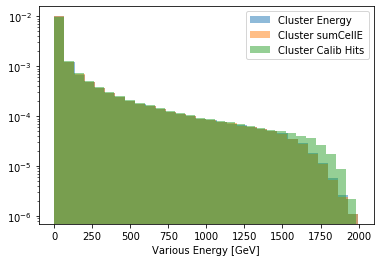

In [11]:
n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(pp['clusterE'], bins=n_bins, normed=True, alpha=0.5, label='Cluster Energy')
plt.hist(pp['cluster_sumCellE'], bins=n_bins, normed=True, alpha=0.5, label='Cluster sumCellE')
plt.hist(pp['cluster_ENG_CALIB_TOT'], bins=n_bins, normed=True, alpha=0.5, label='Cluster Calib Hits')
plt.yscale('log')
plt.xlabel('Various Energy [GeV]')
plt.legend()
plt.savefig(plotpath+'/hist_energy.pdf')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


<Figure size 432x288 with 0 Axes>

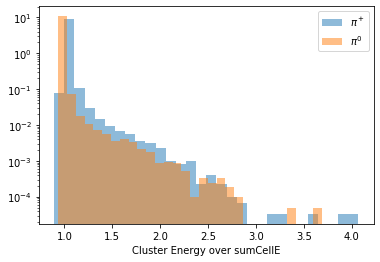

In [17]:
n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(pp['clusterE']/pp['cluster_sumCellE'], bins=n_bins, normed=True, alpha=0.5, label='$\pi^+$')
plt.hist(p0['clusterE']/p0['cluster_sumCellE'], bins=n_bins, normed=True, alpha=0.5, label='$\pi^0$')
plt.yscale('log')
plt.xlabel('Cluster Energy over sumCellE')
plt.legend()
plt.savefig(plotpath+'/hist_ratio_eoversum.pdf')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


<Figure size 432x288 with 0 Axes>

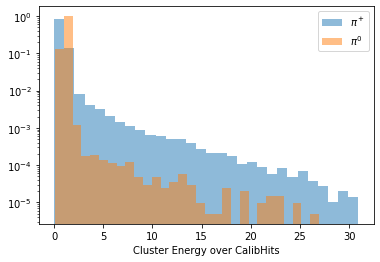

In [18]:
n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(pp['clusterE']/pp['cluster_ENG_CALIB_TOT'], bins=n_bins, normed=True, alpha=0.5, label='$\pi^+$')
plt.hist(p0['clusterE']/p0['cluster_ENG_CALIB_TOT'], bins=n_bins, normed=True, alpha=0.5, label='$\pi^0$')
plt.yscale('log')
plt.xlabel('Cluster Energy over CalibHits')
plt.legend()
plt.savefig(plotpath+'/hist_ratio_eovercalib.pdf')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


<Figure size 432x288 with 0 Axes>

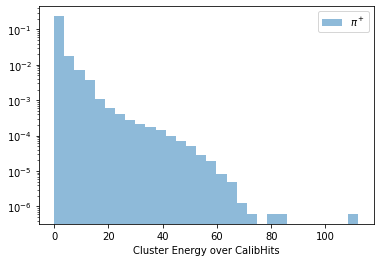

In [6]:
n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(pp['clusterECalib']/pp['cluster_ENG_CALIB_TOT'], bins=n_bins, normed=True, alpha=0.5, label='$\pi^+$')
# plt.hist(p0['clusterECalib']/p0['cluster_ENG_CALIB_TOT'], bins=n_bins, normed=True, alpha=0.5, label='$\pi^0$')
plt.yscale('log')
plt.xlabel('Cluster Energy over CalibHits')
plt.legend()
plt.savefig(plotpath+'/hist_ratio_full_calibeovercalib.pdf')
plt.show()

<Figure size 432x288 with 0 Axes>

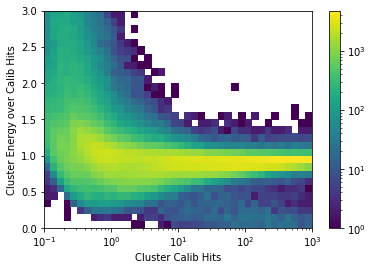

In [7]:
from matplotlib.colors import LogNorm

xbin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
ybin = np.arange(0., 3.1, 0.1)

n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(pp['cluster_ENG_CALIB_TOT'],pp['clusterE']/pp['cluster_ENG_CALIB_TOT'],bins=[xbin,ybin],norm=LogNorm())
# plt.hist(p0['clusterECalib']/p0['cluster_ENG_CALIB_TOT'], bins=n_bins, normed=True, alpha=0.5, label='$\pi^0$')
plt.xscale('log')
plt.ylim(0,3)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Cluster Energy over Calib Hits')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_2D_calib_vs_ratio_full_pp.pdf')
plt.show()

<Figure size 432x288 with 0 Axes>

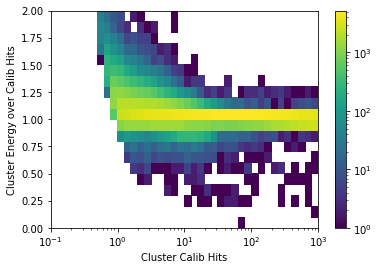

In [47]:
from matplotlib.colors import LogNorm

xbin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
ybin = np.arange(0., 3.1, 0.1)

n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(p0['cluster_ENG_CALIB_TOT'],p0['clusterE']/p0['cluster_ENG_CALIB_TOT'],bins=[xbin,ybin],norm=LogNorm())
# plt.hist(p0['clusterECalib']/p0['cluster_ENG_CALIB_TOT'], bins=n_bins, normed=True, alpha=0.5, label='$\pi^0$')
plt.xscale('log')
plt.ylim(0,2)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Cluster Energy over Calib Hits')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_2D_calib_vs_ratio_p0.pdf')
plt.show()

<Figure size 432x288 with 0 Axes>

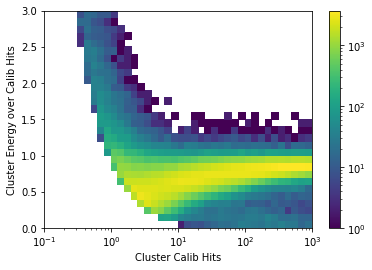

In [54]:
from matplotlib.colors import LogNorm

xbin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
ybin = np.arange(0., 3.1, 0.1)

n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(pp['cluster_ENG_CALIB_TOT']+pp['cluster_ENG_CALIB_OUT_T']+pp['cluster_ENG_CALIB_DEAD_TOT'],pp['clusterE']/(pp['cluster_ENG_CALIB_TOT']+pp['cluster_ENG_CALIB_OUT_T']+pp['cluster_ENG_CALIB_DEAD_TOT']),bins=[xbin,ybin],norm=LogNorm())
# plt.hist(p0['clusterECalib']/p0['cluster_ENG_CALIB_TOT'], bins=n_bins, normed=True, alpha=0.5, label='$\pi^0$')
plt.xscale('log')
plt.ylim(0,3)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Cluster Energy over Calib Hits')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_2D_calibtot_vs_ratio_pp.pdf')
plt.show()

<Figure size 432x288 with 0 Axes>

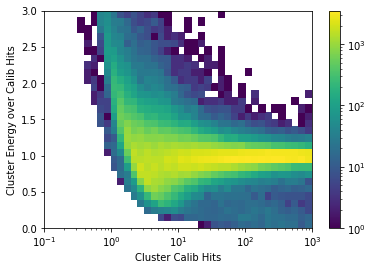

In [53]:
from matplotlib.colors import LogNorm

xbin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
ybin = np.arange(0., 3.1, 0.1)

n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(pp['cluster_ENG_CALIB_TOT']+pp['cluster_ENG_CALIB_OUT_T']+pp['cluster_ENG_CALIB_DEAD_TOT'],pp['clusterECalib']/(pp['cluster_ENG_CALIB_TOT']+pp['cluster_ENG_CALIB_OUT_T']+pp['cluster_ENG_CALIB_DEAD_TOT']),bins=[xbin,ybin],norm=LogNorm())
# plt.hist(p0['clusterECalib']/p0['cluster_ENG_CALIB_TOT'], bins=n_bins, normed=True, alpha=0.5, label='$\pi^0$')
plt.xscale('log')
plt.ylim(0,3)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Cluster Energy over Calib Hits')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_2D_calibtot_vs_ratiocalib_pp.pdf')
plt.show()

<Figure size 432x288 with 0 Axes>

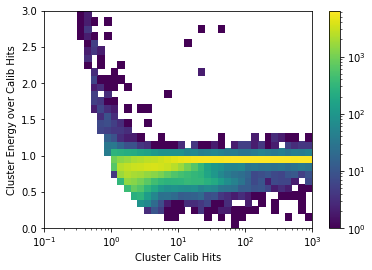

In [56]:
from matplotlib.colors import LogNorm

xbin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
ybin = np.arange(0., 3.1, 0.1)

n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(p0['cluster_ENG_CALIB_TOT']+p0['cluster_ENG_CALIB_OUT_T']+p0['cluster_ENG_CALIB_DEAD_TOT'],p0['clusterE']/(p0['cluster_ENG_CALIB_TOT']+p0['cluster_ENG_CALIB_OUT_T']+p0['cluster_ENG_CALIB_DEAD_TOT']),bins=[xbin,ybin],norm=LogNorm())
# plt.hist(p0['clusterECalib']/p0['cluster_ENG_CALIB_TOT'], bins=n_bins, normed=True, alpha=0.5, label='$\pi^0$')
plt.xscale('log')
plt.ylim(0,3)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Cluster Energy over Calib Hits')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_2D_calibtot_vs_ratio_p0.pdf')
plt.show()

<Figure size 432x288 with 0 Axes>

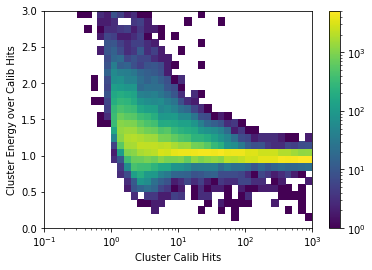

In [55]:
from matplotlib.colors import LogNorm

xbin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
ybin = np.arange(0., 3.1, 0.1)

n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(p0['cluster_ENG_CALIB_TOT']+p0['cluster_ENG_CALIB_OUT_T']+p0['cluster_ENG_CALIB_DEAD_TOT'],p0['clusterECalib']/(p0['cluster_ENG_CALIB_TOT']+p0['cluster_ENG_CALIB_OUT_T']+p0['cluster_ENG_CALIB_DEAD_TOT']),bins=[xbin,ybin],norm=LogNorm())
# plt.hist(p0['clusterECalib']/p0['cluster_ENG_CALIB_TOT'], bins=n_bins, normed=True, alpha=0.5, label='$\pi^0$')
plt.xscale('log')
plt.ylim(0,3)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Cluster Energy over Calib Hits')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_2D_calibtot_vs_ratiocalib_p0.pdf')



<Figure size 432x288 with 0 Axes>

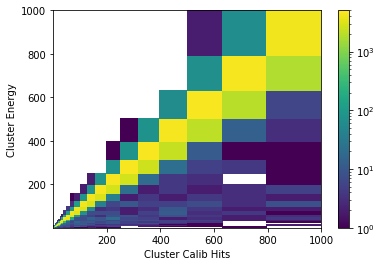

In [6]:
from matplotlib.colors import LogNorm

# xbin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
# ybin = np.arange(0., 3.1, 0.1)
xbin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
ybin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(pp['cluster_ENG_CALIB_TOT'],pp['clusterE'],bins=[xbin,ybin],norm=LogNorm())
# plt.xscale('log')
# plt.ylim(0,3)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Cluster Energy')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_clusterE_calib_log_pp.pdf')

# Load Data

In [11]:
def format_flat(data_0, selected_layer, len_phi = len_phi, len_eta = len_eta):
    layer = layers[selected_layer]
    num_pixels = int(len_phi[selected_layer]*len_eta[selected_layer])

    X = data_0[layer].reshape((len(data_0[layer]),num_pixels))

    y = data_0['label']

    print (X.shape)
    print (y.shape)
    return X, y, num_pixels

In [12]:
x_pp_flat = {}
y_pp_flat = {}
num_pixels_flat = {}
for layer_i, layer_name in enumerate(layers):
    x_pp_flat[layer_i], y_pp_flat[layer_i], num_pixels_flat[layer_i] = format_flat(pp, layer_i)

(435489, 512)
(435489, 1)
(435489, 256)
(435489, 1)
(435489, 128)
(435489, 1)
(435489, 16)
(435489, 1)
(435489, 16)
(435489, 1)
(435489, 8)
(435489, 1)


In [13]:
energy_pp = pp['clusterE']
calib_hits_pp = pp['cluster_ENG_CALIB_TOT']

energy_pp_l = np.log(energy_pp)
calib_hits_pp_l = np.log(calib_hits_pp)

# Time for a Regression

In [6]:

from tensorflow.keras import regularizers
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor


def baseline_pretrain_model():
    regressor = Sequential()
    regressor.add(Dense(units=24, input_dim=2, kernel_initializer='normal', activation='relu'))
    regressor.add(Dense(units=24, kernel_initializer='normal', activation='relu'))
    regressor.add(Dense(units=24, kernel_initializer='normal', activation='relu'))
    regressor.add(Dense(units=24, kernel_initializer='normal', activation='relu'))
    regressor.add(Dense(units=1, kernel_initializer='normal', activation='linear'))
    opt = Adam(lr=1e-4, decay=1e-6)
    regressor.compile(optimizer=opt, loss='mse')

    return regressor

Using TensorFlow backend.


In [7]:
from keras.wrappers.scikit_learn import KerasRegressor

regressor = KerasRegressor(build_fn=baseline_pretrain_model, batch_size=200, epochs=20, verbose=1, validation_split=0.2)  
print(baseline_pretrain_model().summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                72        
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________
No

In [64]:
#load the deep discriminant from last time, we're going to use that as an input
deep_disc = tf.keras.models.load_model(modelpath_c+"model_deep_do20.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [76]:
y_combine_pred = deep_disc.predict([x_flat[0], x_flat[1], x_flat[2], x_flat[3], x_flat[4], x_flat[5]])

In [93]:
# np.concatenate((a, b.T), axis=1)
# print(y_combine_pred[:,1].T)
test = [[energy_pp[i], y_combine_pred[i,1]] for i, element in enumerate(energy_pp)]
pretrain_in_pp = np.asarray(test)
# print(test)
# np.concatenate((energy_pp, y_combine_pred[:,1].T), axis=1)

In [92]:
print(type(pretrain_in))

<class 'numpy.ndarray'>


In [96]:
history = regressor.fit(pretrain_in_pp, calib_hits_pp)


Train on 227187 samples, validate on 56797 samples
Epoch 1/20
227187/227187 [==============================] - 6s 28us/sample - loss: 53246.2224 - val_loss: 626.1943
Epoch 2/20
227187/227187 [==============================] - 6s 26us/sample - loss: 788.1903 - val_loss: 626.2891
Epoch 3/20
227187/227187 [==============================] - 6s 26us/sample - loss: 788.1004 - val_loss: 627.3395
Epoch 4/20
227187/227187 [==============================] - 6s 26us/sample - loss: 788.0243 - val_loss: 625.7386
Epoch 5/20
227187/227187 [==============================] - 6s 26us/sample - loss: 787.3423 - val_loss: 626.3891
Epoch 6/20
227187/227187 [==============================] - 6s 25us/sample - loss: 787.9804 - val_loss: 625.1387
Epoch 7/20
227187/227187 [==============================] - 6s 26us/sample - loss: 786.8263 - val_loss: 631.4705
Epoch 8/20
227187/227187 [==============================] - 6s 25us/sample - loss: 785.7076 - val_loss: 627.4122
Epoch 9/20
227187/227187 [=================

In [97]:
predict_pretrain_pp = regressor.predict(pretrain_in_pp)

283984/283984 [==============================] - 1s 5us/sample


<Figure size 432x288 with 0 Axes>

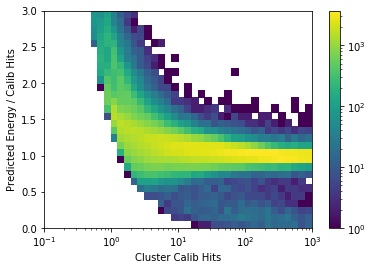

In [133]:
from matplotlib.colors import LogNorm

xbin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
ybin = np.arange(0., 3.1, 0.1)

n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(pp['cluster_ENG_CALIB_TOT'],predict_pretrain_pp / pp['cluster_ENG_CALIB_TOT'],bins=[xbin,ybin],norm=LogNorm())
plt.xscale('log')
plt.ylim(0,3)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Predicted Energy / Calib Hits')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_2D_calib_vs_pretrain_pp.pdf')

<Figure size 432x288 with 0 Axes>

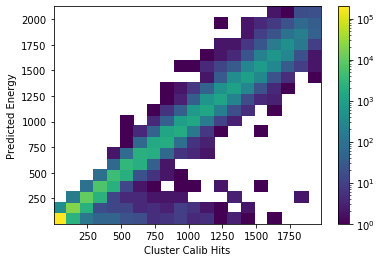

In [101]:
from matplotlib.colors import LogNorm

# xbin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
# ybin = np.arange(0., 3.1, 0.1)

n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(pp['cluster_ENG_CALIB_TOT'],predict_pretrain_pp,bins=[20,20],norm=LogNorm())
# plt.xscale('log')
# plt.ylim(0,3)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Predicted Energy')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_pretrain_pp.pdf')

<Figure size 432x288 with 0 Axes>

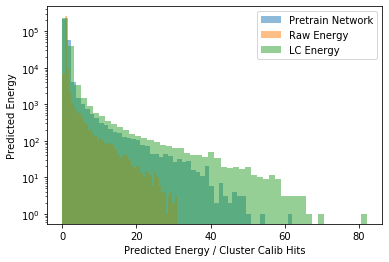

In [110]:
n_bins = 50
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(predict_pretrain_pp / pp['cluster_ENG_CALIB_TOT'], label='Pretrain Network', alpha=0.5, bins = n_bins)
plt.hist(pp['clusterE'] / pp['cluster_ENG_CALIB_TOT'], label='Raw Energy', alpha=0.5, bins = n_bins)
plt.hist(pp['clusterECalib'] / pp['cluster_ENG_CALIB_TOT'], label='LC Energy', alpha=0.5, bins = n_bins)
plt.yscale('log')
# plt.ylim(0,3)
plt.xlabel('Predicted Energy / Cluster Calib Hits')
plt.ylabel('Predicted Energy')
# plt.colorbar()
plt.legend()
plt.savefig(plotpath+'/hist_pretrain_pp_ratio.pdf')

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

In [9]:
def baseline_deep_model():

    with strategy.scope():    

        model_combine = Sequential()

        #EMB1
        input1 = Input(shape=(512,), name = 'input1')
        x1 = Dense(512, kernel_initializer='normal', activation='relu')(input1)
        x1 = Dropout(0.2)(x1)
        x1 = Dense(256, kernel_initializer='normal', activation='relu')(x1)
        x1 = Dropout(0.2)(x1)
        x1 = Dense(128, kernel_initializer='normal', activation='relu')(x1)
        x1 = Dropout(0.2)(x1)

        #EMB2
        input2 = Input(shape=(256,), name = 'input2')
        x2 = Dense(256, kernel_initializer='normal', activation='relu')(input2)
        x2 = Dropout(0.2)(x2)
        x2 = Dense(128, kernel_initializer='normal', activation='relu')(x2)
        x2 = Dropout(0.2)(x2)
        x2 = Dense(64, kernel_initializer='normal', activation='relu')(x2)
        x2 = Dropout(0.2)(x2)

        #EMB3
        input3 = Input(shape=(128,), name = 'input3')
        x3 = Dense(128, kernel_initializer='normal', activation='relu')(input3)
        x3 = Dropout(0.2)(x3)
        x3 = Dense(64, kernel_initializer='normal', activation='relu')(x3)
        x3 = Dropout(0.2)(x3)
        x3 = Dense(32, kernel_initializer='normal', activation='relu')(x3)
        x3 = Dropout(0.2)(x3)

        #Tile0
        input4 = Input(shape=(16,), name = 'input4')
        x4 = Dense(16, kernel_initializer='normal', activation='relu')(input4)
        x4 = Dropout(0.2)(x4)
        x4 = Dense(8, kernel_initializer='normal', activation='relu')(x4)
        x4 = Dropout(0.2)(x4)
        x4 = Dense(4, kernel_initializer='normal', activation='relu')(x4)
        x4 = Dropout(0.2)(x4)

        #Tile1
        input5 = Input(shape=(16,), name = 'input5')
        x5 = Dense(16, kernel_initializer='normal', activation='relu')(input5)
        x5 = Dropout(0.2)(x5)
        x5 = Dense(8, kernel_initializer='normal', activation='relu')(x5)
        x5 = Dropout(0.2)(x5)
        x5 = Dense(4, kernel_initializer='normal', activation='relu')(x5)
        x5 = Dropout(0.2)(x5)

        #Tile2
        input6 = Input(shape=(8,), name = 'input6')
        x6 = Dense(8, kernel_initializer='normal', activation='relu')(input6)
        x6 = Dropout(0.2)(x6)
        x6 = Dense(4, kernel_initializer='normal', activation='relu')(x6)
        x6 = Dropout(0.2)(x6)
        x6 = Dense(2, kernel_initializer='normal', activation='relu')(x6)
        x6 = Dropout(0.2)(x6)

        #the cluster energy goes in here
        input7 = Input(shape=(1,), name = 'input7')
        x7 = Dense(units=24, kernel_initializer='normal', activation='relu')(input7)
        x7 = Dense(units=24, kernel_initializer='normal', activation='relu')(x7)
        x7 = Dense(1, kernel_initializer='normal', activation='relu')(x7)

        #Combination
        x = concatenate([x1, x2, x3, x4, x5, x6, x7]) 
        x = Dense(100, kernel_initializer='normal', activation='relu')(x)
        x = Dropout(0.2)(x)
        x = Dense(50, kernel_initializer='normal', activation='relu')(x)
        x = Dropout(0.2)(x)

        opt = Adam(lr=1e-4, decay=1e-6)


        output_combine = Dense(1, kernel_initializer='normal', activation='linear')(x)

        model_combine = Model(inputs = [input1, input2, input3, input4, input5, input6, input7], outputs = [output_combine])
        model_combine.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])   
        return model_combine


In [12]:
regressor_deep = KerasRegressor(build_fn=baseline_deep_model, batch_size=200*ngpu, epochs=20, verbose=1)  
print(baseline_deep_model().summary())

INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /replica:0/task:0/device:CPU:0 then broadcast to ('/replica:0/task:0/device:CP

# 

In [12]:
history_deep = regressor_deep.fit([x_pp_flat[0], x_pp_flat[1], x_pp_flat[2], x_pp_flat[3], x_pp_flat[4], x_pp_flat[5], energy_pp/np.amax(energy_pp)], calib_hits_pp/np.amax(calib_hits_pp))

INFO:tensorflow:batch_all_reduce: 48 all-reduces with algorithm = nccl,num_packs = 1, agg_small_grads_max_bytes = 0 and agg_small_grads_max_group = 10
Epoch 1/50
355/355 [==============================] - 16s 45ms/step - loss: 0.0191 - acc: 0.0000e+00
Epoch 2/50
355/355 [==============================] - 9s 26ms/step - loss: 0.0019 - acc: 3.5211e-06
Epoch 3/50
355/355 [==============================] - 9s 26ms/step - loss: 9.7059e-04 - acc: 3.5211e-06
Epoch 4/50
355/355 [==============================] - 9s 26ms/step - loss: 8.1949e-04 - acc: 3.5211e-06
Epoch 5/50
355/355 [==============================] - 9s 26ms/step - loss: 7.6351e-04 - acc: 3.5211e-06
Epoch 6/50
355/355 [==============================] - 9s 26ms/step - loss: 7.0850e-04 - acc: 3.5211e-06
Epoch 7/50
355/355 [==============================] - 9s 26ms/step - loss: 6.6865e-04 - acc: 3.5211e-06
Epoch 8/50
355/355 [==============================] - 9s 26ms/step - loss: 6.5352e-04 - acc: 3.5211e-06
Epoch 9/50
355/355 [====

In [13]:
predict_deep_pp = regressor_deep.predict([x_pp_flat[0][:280000], x_pp_flat[1][:280000], x_pp_flat[2][:280000], x_pp_flat[3][:280000], x_pp_flat[4][:280000], x_pp_flat[5][:280000], energy_pp[:280000]/np.amax(energy_pp)]) * np.amax(calib_hits_pp)

350/350 [==============================] - 4s 10ms/step


<Figure size 432x288 with 0 Axes>

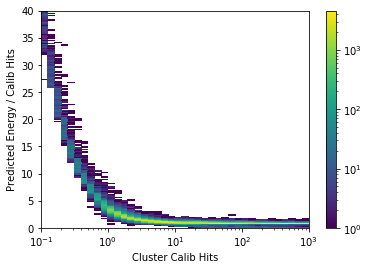

In [23]:
from matplotlib.colors import LogNorm

xbin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
ybin = np.arange(0., 40.1, 0.1)

n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(pp['cluster_ENG_CALIB_TOT'][:280000],predict_deep_pp / pp['cluster_ENG_CALIB_TOT'][:280000],bins=[xbin,ybin],norm=LogNorm())
plt.xscale('log')
plt.ylim(0,40)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Predicted Energy / Calib Hits')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_2D_calib_vs_deep_pp.pdf')

<Figure size 432x288 with 0 Axes>

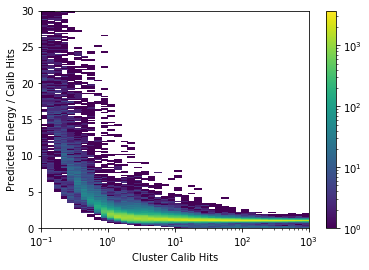

In [26]:
from matplotlib.colors import LogNorm

xbin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
ybin = np.arange(0., 30.1, 0.1)

n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(pp['cluster_ENG_CALIB_TOT'][:280000],pp['clusterECalib'][:280000] / pp['cluster_ENG_CALIB_TOT'][:280000],bins=[xbin,ybin],norm=LogNorm())
plt.xscale('log')
plt.ylim(0,30)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Predicted Energy / Calib Hits')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_2D_calib_vs_lc_pp.pdf')

<Figure size 432x288 with 0 Axes>

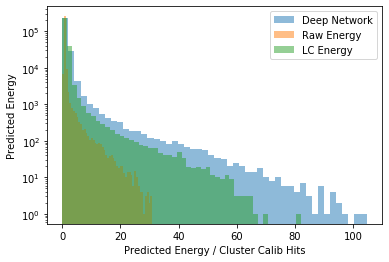

In [29]:
n_bins = 50
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(predict_deep_pp / pp['cluster_ENG_CALIB_TOT'][:280000], label='Deep Network', alpha=0.5, bins = n_bins)
plt.hist(pp['clusterE'] / pp['cluster_ENG_CALIB_TOT'], label='Raw Energy', alpha=0.5, bins = n_bins)
plt.hist(pp['clusterECalib'] / pp['cluster_ENG_CALIB_TOT'], label='LC Energy', alpha=0.5, bins = n_bins)
plt.yscale('log')
# plt.ylim(0,3)
plt.xlabel('Predicted Energy / Cluster Calib Hits')
plt.ylabel('Predicted Energy')
# plt.colorbar()
plt.legend()
plt.savefig(plotpath+'/hist_deep_pp_ratio.pdf')

### First improvement: make better standardization of energy

In [13]:
# demonstrate data standardization with sklearn
from sklearn.preprocessing import StandardScaler
# create scaler
scaler_epp = StandardScaler()
# fit and transform in one step
standardized_energy = scaler_epp.fit_transform(energy_pp.reshape(-1,1))
# inverse transform
#inverse = scaler_epp.inverse_transform(standardized)

In [14]:
scaler_calib_pp = StandardScaler()
standardized_calib = scaler_calib_pp.fit_transform(calib_hits_pp.reshape(-1,1))

In [46]:
history_deep = regressor_deep.fit([x_pp_flat[0], x_pp_flat[1], x_pp_flat[2], x_pp_flat[3], x_pp_flat[4], x_pp_flat[5], standardized_energy], standardized_calib)

INFO:tensorflow:batch_all_reduce: 48 all-reduces with algorithm = nccl,num_packs = 1, agg_small_grads_max_bytes = 0 and agg_small_grads_max_group = 10
Epoch 1/200
355/355 [==============================] - 15s 41ms/step - loss: 0.7291 - acc: 0.0000e+00
Epoch 2/200
355/355 [==============================] - 10s 28ms/step - loss: 0.1081 - acc: 0.0000e+00
Epoch 3/200
355/355 [==============================] - 10s 28ms/step - loss: 0.0347 - acc: 0.0000e+00
Epoch 4/200
355/355 [==============================] - 10s 27ms/step - loss: 0.0293 - acc: 0.0000e+00
Epoch 5/200
355/355 [==============================] - 9s 26ms/step - loss: 0.0278 - acc: 0.0000e+00
Epoch 6/200
355/355 [==============================] - 10s 28ms/step - loss: 0.0262 - acc: 0.0000e+00
Epoch 7/200
355/355 [==============================] - 10s 28ms/step - loss: 0.0256 - acc: 0.0000e+00
Epoch 8/200
355/355 [==============================] - 10s 28ms/step - loss: 0.0249 - acc: 0.0000e+00
Epoch 9/200
355/355 [=============

In [47]:
predict_deep_pp_2 = scaler_calib_pp.inverse_transform(regressor_deep.predict([x_pp_flat[0][:280000], x_pp_flat[1][:280000], x_pp_flat[2][:280000], x_pp_flat[3][:280000], x_pp_flat[4][:280000], x_pp_flat[5][:280000], standardized_energy[:280000]]))

350/350 [==============================] - 5s 15ms/step


<Figure size 432x288 with 0 Axes>

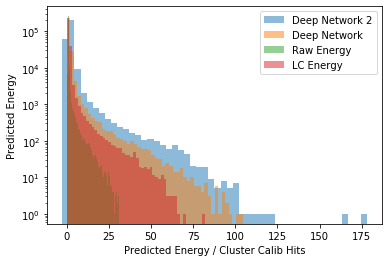

In [49]:
n_bins = 50
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(predict_deep_pp_2 / pp['cluster_ENG_CALIB_TOT'][:280000], label='Deep Network 2', alpha=0.5, bins = n_bins)
plt.hist(predict_deep_pp / pp['cluster_ENG_CALIB_TOT'][:280000], label='Deep Network', alpha=0.5, bins = n_bins)
plt.hist(pp['clusterE'] / pp['cluster_ENG_CALIB_TOT'], label='Raw Energy', alpha=0.5, bins = n_bins)
plt.hist(pp['clusterECalib'] / pp['cluster_ENG_CALIB_TOT'], label='LC Energy', alpha=0.5, bins = n_bins)
plt.yscale('log')
# plt.ylim(0,3)
plt.xlabel('Predicted Energy / Cluster Calib Hits')
plt.ylabel('Predicted Energy')
# plt.colorbar()
plt.legend()
plt.savefig(plotpath+'/hist_deep2_pp_ratio.pdf')

#### Ok, so it got a bit better with more training (and luck?)
But it's still pretty garbage-- doing worse than the original DNN without normalization

## Time for some reweighting

<Figure size 432x288 with 0 Axes>

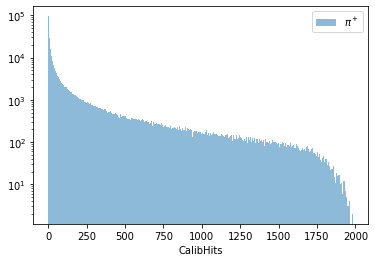

In [16]:
n_bins = 300
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
hist = plt.hist(pp['cluster_ENG_CALIB_TOT'], bins=n_bins, alpha=0.5, label='$\pi^+$')
plt.yscale('log')
plt.xlabel('CalibHits')
plt.legend()
plt.show()

In [8]:
print(type(hist))

<class 'tuple'>


In [13]:
print(hist[1])

[3.90953384e-02 6.61147982e+01 1.32190501e+02 1.98266204e+02
 2.64341907e+02 3.30417610e+02 3.96493312e+02 4.62569015e+02
 5.28644718e+02 5.94720421e+02 6.60796124e+02 7.26871827e+02
 7.92947529e+02 8.59023232e+02 9.25098935e+02 9.91174638e+02
 1.05725034e+03 1.12332604e+03 1.18940175e+03 1.25547745e+03
 1.32155315e+03 1.38762886e+03 1.45370456e+03 1.51978026e+03
 1.58585596e+03 1.65193167e+03 1.71800737e+03 1.78408307e+03
 1.85015877e+03 1.91623448e+03 1.98231018e+03]


In [14]:
print(hist[0])

[1.84002e+05 2.41530e+04 1.35110e+04 9.34400e+03 7.25700e+03 5.81100e+03
 4.70500e+03 3.97400e+03 3.51800e+03 3.13700e+03 2.75200e+03 2.40800e+03
 2.19600e+03 2.01500e+03 1.76800e+03 1.61800e+03 1.50400e+03 1.43100e+03
 1.30100e+03 1.17800e+03 1.10800e+03 1.01600e+03 9.38000e+02 8.66000e+02
 7.48000e+02 6.78000e+02 5.06000e+02 3.33000e+02 1.66000e+02 4.20000e+01]


In [18]:
np.sum(hist[0])

283984.0

In [15]:
def find_bin(val, hist):
    for ibin, edge in enumerate(hist[1]): # loop over the edges
        if val > edge and val <= hist[1][ibin+1]:
            return ibin
    return -1
#     return ibin for ibin, edge in enumerate(hist[1]) if val > edge and val <= hist[1][ibin+1]

In [32]:
find_bin(400,hist)
print(hist[0][60])

503.0


In [17]:
def calc_weights(values, hist):
    weights = []
    tot_norm = np.sum(hist[0])
    for value in values:
        val_bin = find_bin(value, hist)
        weight = 1 / hist[0][val_bin]
        weights.append(weight)
    return weights

In [20]:
weights = calc_weights(pp['cluster_ENG_CALIB_TOT'], hist)

In [95]:
print(weights[0])

0.024390243902439025


<Figure size 432x288 with 0 Axes>

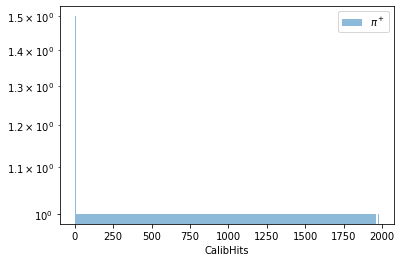

In [96]:
n_bins = 300
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(pp['cluster_ENG_CALIB_TOT'], bins=n_bins, alpha=0.5, label='$\pi^+$',weights=weights_n)
plt.yscale('log')
plt.xlabel('CalibHits')
plt.legend()
plt.show()

In [21]:
weights_n = np.asarray(weights)

In [90]:
print(weights_n)

[6926.43902439   92.4126261    10.0107163  ...  421.96731055  156.72406181
   10.0107163 ]


In [22]:
history_deep = regressor_deep.fit([x_pp_flat[0], x_pp_flat[1], x_pp_flat[2], x_pp_flat[3], x_pp_flat[4], x_pp_flat[5], standardized_energy], standardized_calib, sample_weight=weights_n)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:batch_all_reduce: 48 all-reduces with algorithm = nccl,num_packs = 1, agg_small_grads_max_bytes = 0 and agg_small_grads_max_group = 10
Epoch 1/20
355/355 [==============================] - 16s 46ms/step - loss: 0.1609 - mean_squared_error: 1.0152
Epoch 2/20
355/355 [==============================] - 9s 27ms/step - loss: 0.1323 - mean_squared_error: 0.9005
Epoch 3/20
355/355 [==============================] - 10s 27ms/step - loss: 0.1190 - mean_squared_error: 0.8256
Epoch 4/20
355/355 [==============================] - 9s 27ms/step - loss: 0.1130 - mean_squared_error: 0.8008
Epoch 5/20
355/355 [==============================] - 9s 26ms/step - loss: 0.1085 - mean_squared_error: 0.7844
Epoch 6/20
355/355 [==============================] - 9s 26ms/step - loss: 0.1055 - mean_squared_error: 0.7682
Epoch 7/20
355/355 [==============================] - 9s 26ms/step - loss: 0.1030 - mea

In [110]:
print('test')

test


In [23]:
predict_deep_pp_3 = scaler_calib_pp.inverse_transform(regressor_deep.predict([x_pp_flat[0][:280000], x_pp_flat[1][:280000], x_pp_flat[2][:280000], x_pp_flat[3][:280000], x_pp_flat[4][:280000], x_pp_flat[5][:280000], standardized_energy[:280000]]))

350/350 [==============================] - 3s 10ms/step


<Figure size 432x288 with 0 Axes>

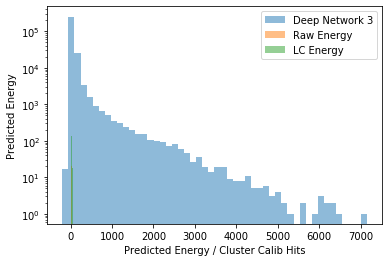

In [24]:
n_bins = 50
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(predict_deep_pp_3 / pp['cluster_ENG_CALIB_TOT'][:280000], label='Deep Network 3', alpha=0.5, bins = n_bins)
# plt.hist(predict_deep_pp / pp['cluster_ENG_CALIB_TOT'][:280000], label='Deep Network', alpha=0.5, bins = n_bins)
plt.hist(pp['clusterE'] / pp['cluster_ENG_CALIB_TOT'], label='Raw Energy', alpha=0.5, bins = n_bins)
plt.hist(pp['clusterECalib'] / pp['cluster_ENG_CALIB_TOT'], label='LC Energy', alpha=0.5, bins = n_bins)
plt.yscale('log')
# plt.ylim(0,3)
plt.xlabel('Predicted Energy / Cluster Calib Hits')
plt.ylabel('Predicted Energy')
# plt.colorbar()
plt.legend()
plt.savefig(plotpath+'/hist_deep2_pp_ratio.pdf')

<Figure size 432x288 with 0 Axes>

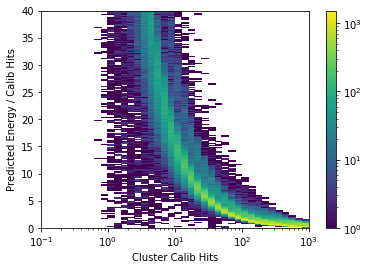

In [25]:
from matplotlib.colors import LogNorm

xbin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
ybin = np.arange(0., 40.1, 0.1)

n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(pp['cluster_ENG_CALIB_TOT'][:280000],predict_deep_pp_3 / pp['cluster_ENG_CALIB_TOT'][:280000],bins=[xbin,ybin],norm=LogNorm())
plt.xscale('log')
plt.ylim(0,40)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Predicted Energy / Calib Hits')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_2D_calib_vs_deep3_pp.pdf')

# Backup and do a 1-regression

In [8]:

from tensorflow.keras import regularizers
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
ngpu=1

def baseline_model():
    regressor = Sequential()
    regressor.add(Dense(units=24, input_dim=1, kernel_initializer='normal', activation='relu'))
    regressor.add(Dense(units=24, kernel_initializer='normal', activation='relu'))
    regressor.add(Dense(units=1, kernel_initializer='normal', activation='linear'))
    opt = Adam(lr=1e-4, decay=1e-6)
    regressor.compile(optimizer=opt, loss='mse')

    return regressor

Using TensorFlow backend.


In [39]:
from keras.wrappers.scikit_learn import KerasRegressor

regressor = KerasRegressor(build_fn=baseline_model, batch_size=200*ngpu, epochs=50, verbose=1)
print(baseline_model().summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 24)                48        
_________________________________________________________________
dense_13 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 25        
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
from sklearn.preprocessing import StandardScaler
# create scaler
scaler_epp = StandardScaler()
scalar_cal = StandardScaler()
# fit and transform in one step
standardized_energy_l = scaler_epp.fit_transform(energy_pp_l.reshape(-1,1))
standardized_calib_l  = scalar_cal.fit_transform(calib_hits_pp_l.reshape(-1,1))
# inverse transform
#inverse = scaler_epp.inverse_transform(standardized)

In [8]:
scaler_lp5 = StandardScaler()
energy_pp_lp5 = scaler_lp5.fit_transform(np.log(energy_pp + 5).reshape(-1,1))

In [40]:
history_baseline = regressor.fit([standardized_energy_l], standardized_calib_l)

Epoch 1/50
435489/435489 [==============================] - 8s 18us/sample - loss: 0.3552
Epoch 2/50
435489/435489 [==============================] - 8s 17us/sample - loss: 0.0390
Epoch 3/50
435489/435489 [==============================] - 8s 18us/sample - loss: 0.0360
Epoch 4/50
435489/435489 [==============================] - 8s 17us/sample - loss: 0.0355
Epoch 5/50
435489/435489 [==============================] - 8s 18us/sample - loss: 0.0355
Epoch 6/50
435489/435489 [==============================] - 8s 17us/sample - loss: 0.0355
Epoch 7/50
435489/435489 [==============================] - 8s 18us/sample - loss: 0.0355
Epoch 8/50
435489/435489 [==============================] - 8s 18us/sample - loss: 0.0354
Epoch 9/50
435489/435489 [==============================] - 8s 18us/sample - loss: 0.0354
Epoch 10/50
435489/435489 [==============================] - 8s 18us/sample - loss: 0.0354
Epoch 11/50
435489/435489 [==============================] - 8s 18us/sample - loss: 0.0354
Epoch 12

In [66]:
energies = standardized_energy_l[:280000]

In [21]:
predict_base_pp = np.exp(scalar_cal.inverse_transform(regressor.predict([standardized_energy_l])))


435489/435489 [==============================] - 2s 3us/sample


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

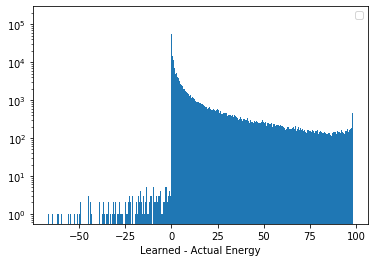

In [22]:
n_bins = 500
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(predict_base_pp-energy_pp,bins = n_bins)
# plt.hist(predict_base_pp / pp['cluster_ENG_CALIB_TOT'][:280000], label='Baseline Network', alpha=0.5, bins = n_bins)
# # plt.hist(predict_deep_pp / pp['cluster_ENG_CALIB_TOT'][:280000], label='Deep Network', alpha=0.5, bins = n_bins)
# plt.hist(pp['clusterE'] / pp['cluster_ENG_CALIB_TOT'], label='Raw Energy', alpha=0.5, bins = n_bins)
# plt.hist(pp['clusterECalib'] / pp['cluster_ENG_CALIB_TOT'], label='LC Energy', alpha=0.5, bins = n_bins)
plt.yscale('log')
# plt.ylim(0,3)
plt.xlabel('Learned - Actual Energy')
# plt.colorbar()
plt.legend()
plt.show()

In [23]:
from scipy import stats
print(stats.mode(predict_base_pp-energy_pp))

ModeResult(mode=array([-0.21504861]), count=array([97]))


<Figure size 432x288 with 0 Axes>

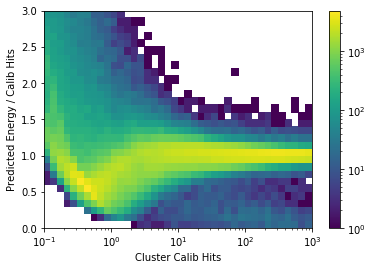

In [27]:
from matplotlib.colors import LogNorm

xbin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
ybin = np.arange(0., 3.1, 0.1)

n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(pp['cluster_ENG_CALIB_TOT'],predict_base_pp / pp['cluster_ENG_CALIB_TOT'],bins=[xbin,ybin],norm=LogNorm())
plt.xscale('log')
plt.ylim(0,3)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Predicted Energy / Calib Hits')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_2D_calib_vs_base_pp.pdf')

<Figure size 432x288 with 0 Axes>

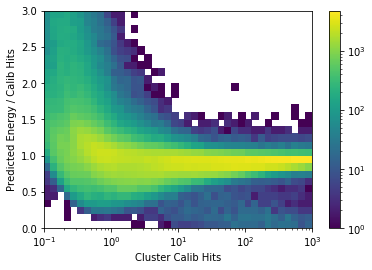

In [28]:
from matplotlib.colors import LogNorm

xbin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
ybin = np.arange(0., 3.1, 0.1)

n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(pp['cluster_ENG_CALIB_TOT'], energy_pp / pp['cluster_ENG_CALIB_TOT'],bins=[xbin,ybin],norm=LogNorm())
plt.xscale('log')
plt.ylim(0,3)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Predicted Energy / Calib Hits')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_2D_calib_vs_raw_pp.pdf')

<Figure size 432x288 with 0 Axes>

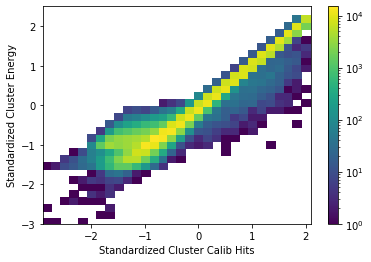

In [34]:
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
# plt.hist2d(standardized_calib_l, standardized_energy_l,bins=[20,20],norm=LogNorm())
plt.hist2d(standardized_calib_l.reshape(len(standardized_calib_l)), standardized_energy_l.reshape(len(standardized_energy_l)),bins=[30,30], norm=LogNorm())
# plt.xscale('log')
plt.ylim(-3,2.5)
plt.xlabel('Standardized Cluster Calib Hits')
plt.ylabel('Standardized Cluster Energy')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_normed_clusterE_calib_log_pp.pdf')

In [30]:
predict_untransform = regressor.predict([standardized_energy_l])

435489/435489 [==============================] - 1s 3us/sample


<Figure size 432x288 with 0 Axes>

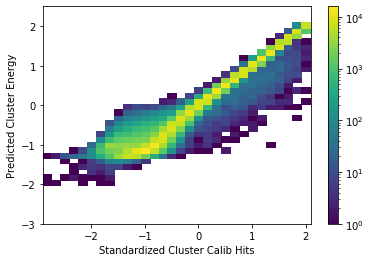

In [33]:
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
# plt.hist2d(standardized_calib_l, standardized_energy_l,bins=[20,20],norm=LogNorm())
plt.hist2d(standardized_calib_l.reshape(len(standardized_calib_l)), predict_untransform,bins=[30,30], norm=LogNorm())
# plt.xscale('log')
plt.ylim(-3,2.5)
plt.xlabel('Standardized Cluster Calib Hits')
plt.ylabel('Predicted Cluster Energy')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_normed_predict_calib_log_pp.pdf')

In [51]:
predict_untransform.shape

(280000,)

In [29]:
standardized_calib_l.shape

(283984, 1)

In [33]:
print(pp['cluster_ENG_CALIB_TOT'])

[1790.40478516   73.32950592   12.95556164 ...  319.09121704  120.67864227
   10.19853401]


<Figure size 432x288 with 0 Axes>

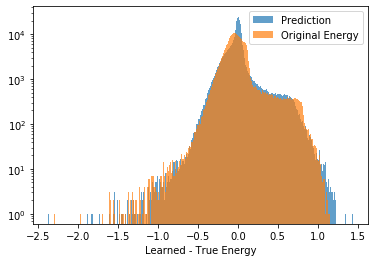

In [36]:
n_bins = 500
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(predict_untransform - standardized_calib_l.reshape(len(standardized_calib_l)), bins = n_bins, label = 'Prediction', alpha=0.7)
plt.hist(standardized_energy_l.reshape(len(standardized_energy_l)) - standardized_calib_l.reshape(len(standardized_calib_l)), bins = n_bins, label = 'Original Energy',alpha=0.7)
# plt.hist(predict_base_pp / pp['cluster_ENG_CALIB_TOT'][:280000], label='Baseline Network', alpha=0.5, bins = n_bins)
# # plt.hist(predict_deep_pp / pp['cluster_ENG_CALIB_TOT'][:280000], label='Deep Network', alpha=0.5, bins = n_bins)
# plt.hist(pp['clusterE'] / pp['cluster_ENG_CALIB_TOT'], label='Raw Energy', alpha=0.5, bins = n_bins)
# plt.hist(pp['clusterECalib'] / pp['cluster_ENG_CALIB_TOT'], label='LC Energy', alpha=0.5, bins = n_bins)
plt.yscale('log')
# plt.ylim(0,3)
plt.xlabel('Learned - True Energy')
# plt.colorbar()
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

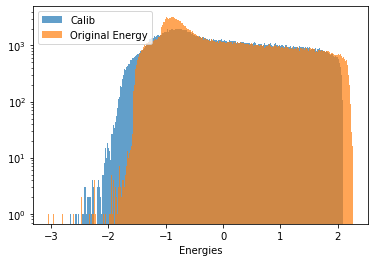

In [37]:
n_bins = 500
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(standardized_calib_l.reshape(len(standardized_calib_l)), bins = n_bins, label = 'Calib', alpha=0.7)
plt.hist(standardized_energy_l.reshape(len(standardized_energy_l)) , bins = n_bins, label = 'Original Energy',alpha=0.7)
# plt.hist(predict_base_pp / pp['cluster_ENG_CALIB_TOT'][:280000], label='Baseline Network', alpha=0.5, bins = n_bins)
# # plt.hist(predict_deep_pp / pp['cluster_ENG_CALIB_TOT'][:280000], label='Deep Network', alpha=0.5, bins = n_bins)
# plt.hist(pp['clusterE'] / pp['cluster_ENG_CALIB_TOT'], label='Raw Energy', alpha=0.5, bins = n_bins)
# plt.hist(pp['clusterECalib'] / pp['cluster_ENG_CALIB_TOT'], label='LC Energy', alpha=0.5, bins = n_bins)
plt.yscale('log')
# plt.ylim(0,3)
plt.xlabel('Energies')
# plt.colorbar()
plt.legend()
plt.show()

## make slices of ereco/etrue in a few bins of ereco?

<Figure size 432x288 with 0 Axes>

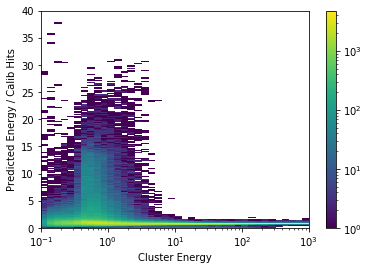

In [38]:
from matplotlib.colors import LogNorm

xbin = [10**exp for exp in  np.arange(-1.0, 3.1, 0.1)]
ybin = np.arange(0., 40.1, 0.1)

n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(energy_pp, energy_pp / pp['cluster_ENG_CALIB_TOT'],bins=[xbin,ybin],norm=LogNorm())
plt.xscale('log')
plt.ylim(0,40)
plt.xlabel('Cluster Energy')
plt.ylabel('Predicted Energy / Calib Hits')
plt.colorbar()
# plt.legend()
plt.savefig(plotpath+'/hist_2D_calib_vs_raw_pp_xreco.pdf')

In [ ]:
model.add(Conv1D(40,2,input_shape=(6,512),activation='relu',
                 kernel_initializer = "he_normal"))
model.add(Dropout(.3))
model.add(Conv1D(40,2,activation='relu',kernel_initializer = "he_normal"))
model.add(Dropout(.3))
model.add(MaxPooling1D(2))
model.add(Conv1D(30,2,activation='relu',kernel_initializer = "he_normal"))
model.add(Dropout(.3))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()